In [1]:
### POST-PROCESSING ####


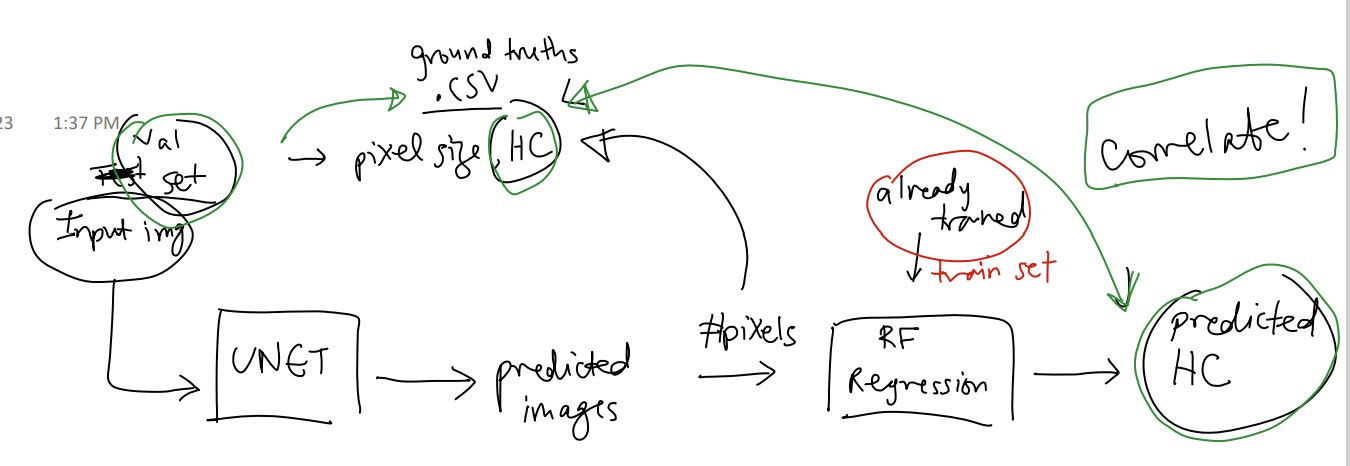

In [2]:
import os
from IPython.display import Image  as pyImage

flowchart_path = "Img/flowchart.jpg"
os.path.exists(flowchart_path)
pyImage(flowchart_path)


In [3]:
# TRAINING STEPS
# I am going to use train_splitted_val_image to feed in the function "Count_PIXEL SIZE" -- this will be train_X [pixel_count]
# there is a pixel_size in the csv, this is also train X[pixel_size]
# taking train_X[pixel_count, pixel_size] to fit Random Forest regressor, and Linear regressor
# there will be a train_Y which is HeadCircum (HC)

In [4]:
#  pred_image7  fiename 2, 11, 014,  this match the filename list in val_split..csv

In [5]:
# VALIDATION STEPS
# I am going to use UNET_Predicted_image to feed in the function "Count_PIXEL SIZE"  -- this will be val_X[pixl_count]
# I check that val
# use the csv match the UNET_Predicted_image filename
# continue the proceess to us RFmodel --> I will get a val_Y  (HC)

# on the same csvm there are also ground truth HC -> this is true_Y

# plot val_Y against true_Y


In [82]:
#import os  #imported already
from glob import glob
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import tree
import joblib
import cv2

import gradio as gr
#import graphviz



In [7]:
data_path_to = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/'
os.path.exists(data_path_to)

True

In [8]:
local_data_path_to="Data/Training-Splitted/"
os.path.exists(local_data_path_to)

True

In [9]:
# Jun 14
# train_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/Annotation/'
# files = sorted(os.listdir(train_img_data_path))
#print(files)



In [10]:
#Jun 15

train_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'
files = sorted(os.listdir(train_img_data_path))
print(files)
    

['002_HC_Annotation.png', '011_HC_Annotation.png', '014_3HC_Annotation.png', '014_HC_Annotation.png', '015_HC_Annotation.png', '017_HC_Annotation.png', '020_HC_Annotation.png', '023_HC_Annotation.png', '030_HC_Annotation.png', '032_2HC_Annotation.png', '033_HC_Annotation.png', '034_HC_Annotation.png', '036_HC_Annotation.png', '041_HC_Annotation.png', '043_HC_Annotation.png', '044_HC_Annotation.png', '045_HC_Annotation.png', '047_HC_Annotation.png', '050_2HC_Annotation.png', '055_HC_Annotation.png', '057_HC_Annotation.png', '059_HC_Annotation.png', '061_HC_Annotation.png', '065_HC_Annotation.png', '066_HC_Annotation.png', '070_HC_Annotation.png', '086_HC_Annotation.png', '088_2HC_Annotation.png', '091_HC_Annotation.png', '095_HC_Annotation.png', '100_2HC_Annotation.png', '108_3HC_Annotation.png', '113_HC_Annotation.png', '116_HC_Annotation.png', '121_2HC_Annotation.png', '124_2HC_Annotation.png', '124_HC_Annotation.png', '125_2HC_Annotation.png', '126_2HC_Annotation.png', '127_HC_Annota

In [11]:
local_predicted_image_path = 'Data/predicted_image7'
os.path.exists(local_predicted_image_path)

True

In [12]:
train_img_data_path

'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'

In [13]:
pixel_count=[]
for f in files:
    label = Image.open(train_img_data_path+f)
    label = np.array(label)
    label = tf.convert_to_tensor(label)
    label = tf.cast(label, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    pixel_count.append(np.sum(label))


In [14]:
print(pixel_count)

[2820, 3208, 1980, 2044, 2928, 2228, 3188, 1720, 3020, 1612, 1984, 2048, 2200, 2380, 2888, 1556, 3388, 2140, 2892, 2732, 3616, 2504, 2152, 2296, 2860, 1932, 1840, 2068, 3379, 3076, 1632, 2160, 2284, 2008, 3324, 3504, 3216, 3296, 3644, 1928, 2152, 3132, 1804, 2392, 3316, 3380, 3220, 2204, 2728, 3336, 3020, 1960, 3144, 3380, 1972, 1560, 2768, 2772, 3720, 1684, 1752, 3652, 3932, 3672, 3208, 3152, 3648, 3136, 3792, 2916, 2068, 3356, 3804, 3304, 3592, 3828, 3180, 3024, 3064, 2684, 4028, 4064, 3520, 3416, 3596, 3604, 2916, 4276, 3408, 2860, 2844, 3952, 4160, 2976, 3428, 3552, 3796, 3424, 4088, 4128, 3276, 3900, 3372, 3652, 3368, 3452, 3944, 3060, 4192, 3128, 4060, 3200, 3056, 3612, 3744, 3840, 3768, 3756, 3172, 3208, 3848, 3728, 3524, 3048, 3368, 3412, 4068, 3596, 3120, 3092, 3332, 2348, 3180, 3576, 2036, 2596, 4304, 2912, 3656, 3744, 3824, 2328, 4296, 3296, 3332, 3512, 2796, 3200, 4092, 3844, 3908, 3556, 3044, 3092, 3316, 3852, 3176, 2792, 4212, 3420, 3244, 3964, 3704, 3252, 3828, 3480, 379

In [15]:
#train_pixel_sz_HC_file = local_data_path_to + 'training_set_pixel_size_and_HC.csv'  #Jun 14
# switch to use val_split as Seida train her UNET

train_pixel_sz_HC_file = local_data_path_to + 'val_split_pixel_size_and_HC.csv'  #Jun 15
os.path.exists(train_pixel_sz_HC_file)

True

In [16]:
#train_pixel_sz_HC_df = pd.read_csv(train_pixel_sz_HC_file)  #Jun 14 run
#train_pixel_sz_HC_df.head()

In [17]:
train_pixel_sz_HC_file  #jun 15

'Data/Training-Splitted/val_split_pixel_size_and_HC.csv'

In [18]:
train_pixel_sz_HC_df = pd.read_csv(train_pixel_sz_HC_file)   #jun 15
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm)
0,2,002_HC.png,0.062033,68.75
1,12,011_HC.png,0.055484,69.90
2,16,014_3HC.png,0.077308,60.26
3,17,014_HC.png,0.078906,63.34
4,18,015_HC.png,0.060416,69.30


In [19]:
#train_pixel_sz_HC_df = train_pixel_sz_HC_df.iloc[:, -3:]
#train_pixel_sz_HC_df.head()

In [20]:
# Define a function to update the filename
def update_filename(filename):
    return filename.replace(".png", "_Annotation.png")

# Apply the function to create a new column with updat filenames
train_pixel_sz_HC_df['anno_filename'] = train_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))


In [21]:
train_pixel_sz_HC_df.head()  #jun 14 run

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png


In [22]:
##### function get_pixe_count get_pixel_count(img_data_path, filename) ###
def get_pixel_count(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count

train_pixel_sz_HC_df['pixel_count'] = train_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(train_img_data_path, x))


In [23]:
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,2820
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,3208
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,1980
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,2044
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,2928


In [24]:
# Remove rows with missing values
# cleaned_df = train_pixel_sz_HC_df.dropna()  # no need to do it anymore
train_pixel_sz_HC_df = train_pixel_sz_HC_df.dropna()  # just in case

In [25]:
#Set target
target_name ='head circumference (mm)'

#y = cleaned_df[target_name]
y = train_pixel_sz_HC_df[target_name]

In [26]:
#Set Input Feature X = [x1,, x2]
feature_names = ['pixel_count','pixel size(mm)']
#X = cleaned_df[feature_names]
X = train_pixel_sz_HC_df[feature_names]

In [27]:
# do linear regression mmodel first
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
#from sklearn.linear_model import LinearRegression

#model1 = LinearRegression()
#model1.fit(X_train1, y_train1)


In [29]:
from sklearn.linear_model import LinearRegression

# Apply transformation to the target variable
weight = 300
y_train1_transformed = y_train1 + weight

# Create and fit the linear regression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1_transformed)


LinearRegression()

In [30]:
# Make predictions on test data
y_pred = model1.predict(X_test1)

# Reverse the transformation
y_pred_transformed = y_pred - weight
y_pred1 = y_pred_transformed 


In [31]:
# evul linear reg model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred1 = model1.predict(X_test1)

# Calculate evaluation metrics
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)

print("Mean Squared Error of linear regression : ", mse1, ("(mm)"))
print("R-squared Score:", r2_1)


Mean Squared Error of linear regression :  88891.22647359964 (mm)
R-squared Score: -23.13927798576536


In [32]:
np.average(y_pred1)

470.5775944535239

In [33]:
train_pixel_sz_HC_df[target_name].mean()

177.98666666666668

In [34]:
## this is train model linear regression using train set
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

print("Coefficients:", model1.coef_[0])
print("Coefficients:", model1.coef_[1])

formula = "y = " + str(model1.coef_[0]) + " *  " + feature_names[0] + " + " + str(model1.coef_[1]) + " * " + feature_names[1]
print(formula)


Intercept: 133.89311331472328
Coefficients: [5.57214180e-02 1.15271953e+03]
Coefficients: 0.0557214180407123
Coefficients: 1152.719528109008
y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)


In [35]:
### what do yu think ?

In [36]:
print(feature_names)

['pixel_count', 'pixel size(mm)']


In [37]:
# Train regress model 2: random forest regressor #####

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [39]:
# Split into validation and training data
#Train Random forest model on train_x train_y
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

# Make predictions on the validation data
rf_val_predictions = rf_model.predict(val_X)

# Calculate the mean absolute error
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

# Print the mean absolute error
print("Random Forest Validation MAE:", rf_val_mae)


#rf_val_mae

Random Forest Validation MAE: 5.161419999999979


In [40]:
# To improve accuracy, create a new Random Forest model which I will train on all training data
rf_model_on_full_train_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_train_data.fit(X, y)


RandomForestRegressor(random_state=1)

In [41]:
rf_val_predictions = rf_model_on_full_train_data.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

rf_val_mae

1.4117973333333338

In [42]:
rf_model_on_full_train_data.feature_importances_
feature_importance = rf_model_on_full_train_data.feature_importances_

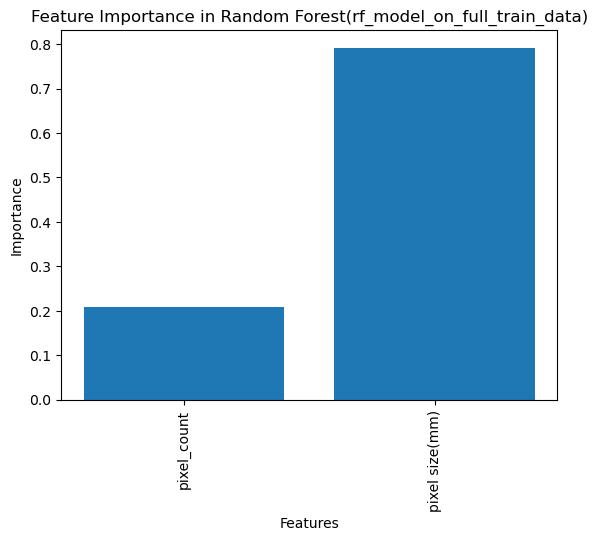

<Figure size 640x480 with 0 Axes>

In [43]:
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest(rf_model_on_full_train_data)')
plt.xticks(rotation='vertical')
plt.show()

# Save the figure as an image file
plt.savefig('Output\RF_feature_importance.png')

In [ ]:
#----prediction with ----

In [ ]:
# prediction on made-up data
#new_data = pd.DataFrame({'pixel_count': [2000, 3000], 'pixel size(mm)': [30, 35]})
#prediction1 = model1.predict(new_data)
#prediction2 = rf_model_on_full_train_data.predict(new_data)

#print("Predicted Head Circum with linear regression", prediction1)
#print("Predicted Head Circum with random tree regression", prediction2)

In [ ]:
# continue to "validate"  #Jun 14
# val_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'

In [ ]:
#val_img_data_path

In [ ]:
# note to self - val + test are together.
#test_pixel_sz_HC_file = local_data_path_to + 'test_set_pixel_size.csv'
#os.path.exists(test_pixel_sz_HC_file )

In [45]:
# Validate UNET_Pred_Image_label
val_img_data_path = 'Data\Predicted_image7'
os.path.exists(val_img_data_path)

True

In [46]:
val_pixel_sz_HC_file = local_data_path_to + 'val_split_pixel_size_and_HC.csv'
os.path.exists(val_pixel_sz_HC_file)

True

In [47]:
# continue to "validate"
val_pixel_sz_HC_df = pd.read_csv(val_pixel_sz_HC_file)
val_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm)
0,2,002_HC.png,0.062033,68.75
1,12,011_HC.png,0.055484,69.90
2,16,014_3HC.png,0.077308,60.26
3,17,014_HC.png,0.078906,63.34
4,18,015_HC.png,0.060416,69.30


In [48]:
# continue to "validate"
val_pixel_sz_HC_df['anno_filename'] = val_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))

In [ ]:
val_pixel_sz_HC_df

In [49]:
# continue to "validate"  apply pixel count on "val img data"
val_pixel_sz_HC_df['pixel_count'] = val_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(val_img_data_path, x))


In [50]:
# Calculate summary statistics
summary_stats = val_pixel_sz_HC_df['pixel_count'].describe()

# Print the summary statistics
print(summary_stats)


count     300.000000
mean     1880.190000
std       554.125048
min        84.000000
25%      1593.000000
50%      1996.500000
75%      2280.000000
max      2916.000000
Name: pixel_count, dtype: float64


In [ ]:
val_pixel_sz_HC_df

In [51]:
# continue to "validate"
val_pixel_sz_HC_df=val_pixel_sz_HC_df.dropna()  #just in case

In [52]:
# continue to "validate"
val_pixel_sz_HC_df[feature_names].head()

,pixel_count,pixel size(mm)
0,861,0.062033
1,273,0.055484
2,219,0.077308
3,780,0.078906
4,735,0.060416


In [53]:
print(feature_names)

['pixel_count', 'pixel size(mm)']


In [54]:
X_val = val_pixel_sz_HC_df[feature_names]
X_val

,pixel_count,pixel size(mm)
0,861,0.062033
1,273,0.055484
2,219,0.077308
3,780,0.078906
4,735,0.060416
...,...,...
295,1818,0.246141
296,1110,0.202475
297,1698,0.210600
298,1668,0.181221


In [55]:
# linear regression model prediction
y_pred_w_LR = model1.predict(X_val)
y_pred_w_LR

array([253.375401  , 213.06269598, 235.21019011, 268.3125935 ,
       244.49057098, 286.51332025, 277.77220036, 316.65432801,
       248.55911988, 262.81566107, 279.83150749, 285.05266901,
       320.87020854, 237.07995105, 269.6045358 , 298.98547704,
       245.1840028 , 311.39471627, 298.23452641, 252.70426143,
       273.50171361, 252.89862105, 295.40118566, 294.17420044,
       276.38632717, 300.38353753, 330.49734829, 301.79926676,
       211.35008583, 282.98206327, 304.53137707, 310.50894307,
       326.73467438, 323.07156247, 299.11869984, 313.73707079,
       305.35316137, 252.85464355, 232.39176172, 333.69888549,
       327.04616343, 278.59564888, 357.45954972, 328.02817006,
       324.58253875, 310.54936638, 319.83406807, 336.18384343,
       339.26474662, 286.49118428, 346.47320152, 398.7080793 ,
       303.71193977, 270.52844809, 377.2198463 , 429.39603521,
       341.95510451, 305.34140249, 286.0039689 , 469.43935406,
       402.10761575, 296.18160212, 358.50582483, 341.57

In [56]:
print(target_name)

head circumference (mm)


In [57]:
y_val = val_pixel_sz_HC_df[target_name]
y_val

0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [58]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(y_val, y_pred_w_LR)

print("Linear regression model: " + formula)
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Linear regression model: y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)
Correlation coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85


In [59]:
val_pixel_sz_HC_df["predicted HC from LM"] = y_pred_w_LR

In [60]:
# after lapply annotated filename and pixel count function
val_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861,253.375401
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273,213.062696
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219,235.210190
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780,268.312593
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735,244.490571


In [61]:
print(formula)

y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)


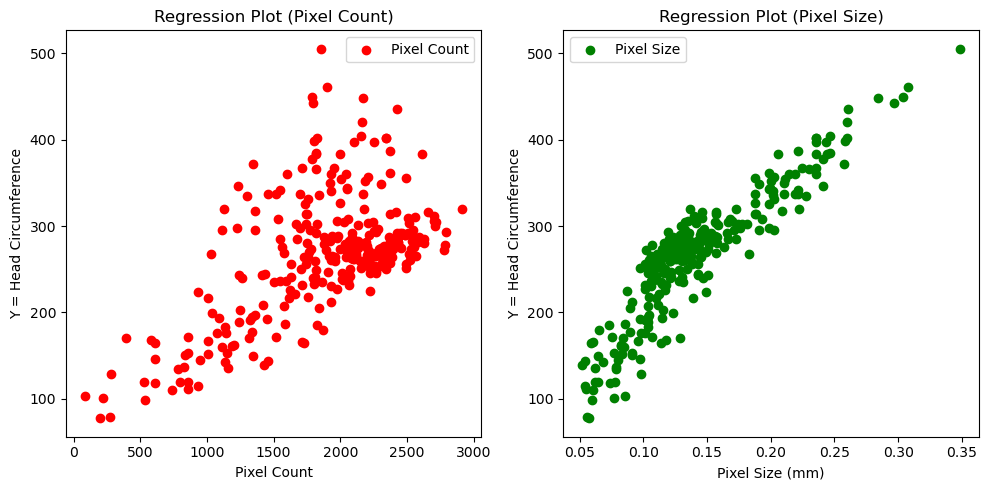

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Convert pixel_count and pixel_size to arrays
pixel_count = np.array(val_pixel_sz_HC_df["pixel_count"])
pixel_size = np.array(val_pixel_sz_HC_df["pixel size(mm)"])

# Compute the corresponding y values based on the equation
y = 0.05572141804071231 * pixel_count + 1152.7195281090083 * pixel_size

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pixel count subplot
ax1.scatter(pixel_count, y, color='red', label='Pixel Count')
ax1.set_xlabel('Pixel Count')
ax1.set_ylabel('Y = Head Circumference')
ax1.set_title('Regression Plot (Pixel Count)')


# Plot the pixel size subplot
ax2.scatter(pixel_size, y, color='green', label='Pixel Size')
ax2.set_xlabel('Pixel Size (mm)')
ax2.set_ylabel('Y = Head Circumference')
ax2.set_title('Regression Plot (Pixel Size)')


# Add a legend to the subplots
ax1.legend()
ax2.legend()

# Adjust the spacing between subplots 
plt.tight_layout()

# Show the plots
plt.show()






In [63]:
X_val



,pixel_count,pixel size(mm)
0,861,0.062033
1,273,0.055484
2,219,0.077308
3,780,0.078906
4,735,0.060416
...,...,...
295,1818,0.246141
296,1110,0.202475
297,1698,0.210600
298,1668,0.181221


In [64]:
y_pred2_w_RF = rf_model_on_full_train_data.predict(X_val)

val_pixel_sz_HC_df["predicted HC from RF"] = y_pred2_w_RF

In [65]:
import numpy as np

# Calculate summary statistics
mean = np.mean(y_pred2_w_RF)
std = np.std(y_pred2_w_RF)
min_value = np.min(y_pred2_w_RF)
max_value = np.max(y_pred2_w_RF)

# Print the summary statistics
print("Mean:", mean)
print("Standard Deviation:", std)
print("Minimum:", min_value)
print("Maximum:", max_value)



Mean: 114.59561066666666
Standard Deviation: 40.867711863307825
Minimum: 62.96160000000008
Maximum: 263.82059999999984


In [66]:
val_pixel_sz_HC_df

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM,predicted HC from RF
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861,253.375401,63.5237
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273,213.062696,63.6042
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219,235.210190,62.9616
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780,268.312593,63.7491
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735,244.490571,63.4824
...,...,...,...,...,...,...,...,...
295,970,783_4HC.png,0.246141,320.00,783_4HC_Annotation.png,1818,518.925937,184.0790
296,976,787_HC.png,0.202475,324.60,787_HC_Annotation.png,1110,429.141222,142.0166
297,982,792_HC.png,0.210600,299.17,792_HC_Annotation.png,1698,471.270900,150.3146
298,985,794_HC.png,0.181221,308.50,794_HC_Annotation.png,1668,435.732987,126.1120


In [67]:
y_val


0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [68]:
# Calculate the correlation coefficient and p-value  # linear regression
correlation_lr, p_value_lr = pearsonr(y_val, y_pred_w_LR)

print("Linear regression model: " + formula)
print("Correlation coefficient:", correlation_lr)
print("p-value:", p_value_lr)
print("MAE:", mse1)

print(" ")
correlation_rf, p_value_rf = pearsonr(y_val, y_pred2_w_RF)

print("random tree regression model: " )
print("Correlation coefficient:", correlation_rf)
np.set_printoptions(precision=8)
print("p-value:", p_value_rf)
print("MAE:", rf_val_mae)


# p-value = 0 that is reject null hypothesis-- the 
# Compare the models
if abs(correlation_lr) > abs(correlation_rf):
    best_model = "Linear Regression"
    best_correlation = correlation_lr
    best_p_value = p_value_lr
else:
    best_model = "Random Forest"
    best_correlation = correlation_rf
    best_p_value = p_value_rf

print("  ")
print("Best Model based on correlation:")
print("Model:", best_model)
print("Correlation Coefficient:", best_correlation)
print("p-value:", best_p_value)

Linear regression model: y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)
Correlation coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85
MAE: 88891.22647359964
 
random tree regression model: 
Correlation coefficient: 0.8006404828563823
p-value: 2.915792071831754e-68
MAE: 1.4117973333333338
  
Best Model based on correlation:
Model: Linear Regression
Correlation Coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85


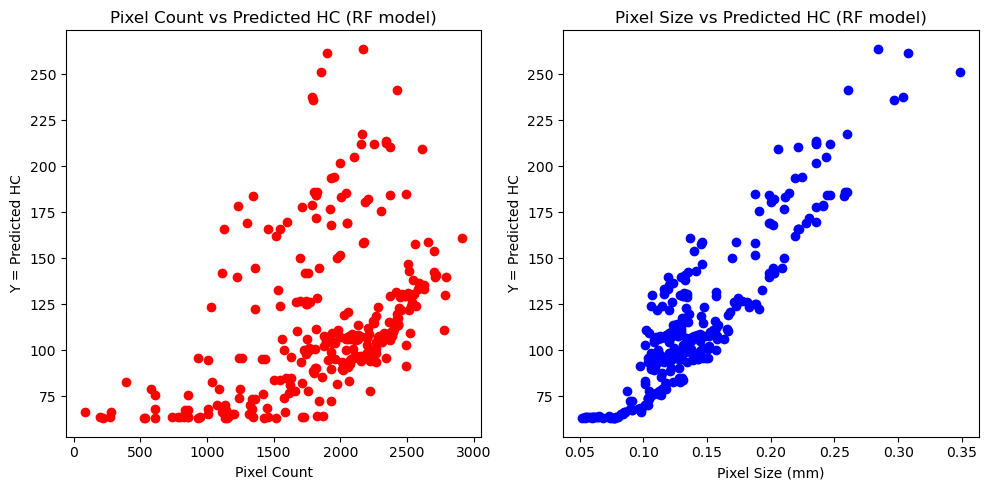

In [69]:
import matplotlib.pyplot as plt

# Get the feature values for plotting
pixel_count = val_pixel_sz_HC_df['pixel_count']
pixel_size = val_pixel_sz_HC_df['pixel size(mm)']


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot pixel_count vs y_pred_rf
axs[0].scatter(pixel_count, y_pred2_w_RF, color='red', label='Predicted Values')
axs[0].set_xlabel('Pixel Count')
axs[0].set_ylabel('Y = Predicted HC')
axs[0].set_title('Pixel Count vs Predicted HC (RF model)')

# Plot pixel_size vs y_pred_rf
axs[1].scatter(pixel_size, y_pred2_w_RF, color='blue', label='Predicted Values')
axs[1].set_xlabel('Pixel Size (mm)')
axs[1].set_ylabel('Y = Predicted HC')
axs[1].set_title('Pixel Size vs Predicted HC (RF model)')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



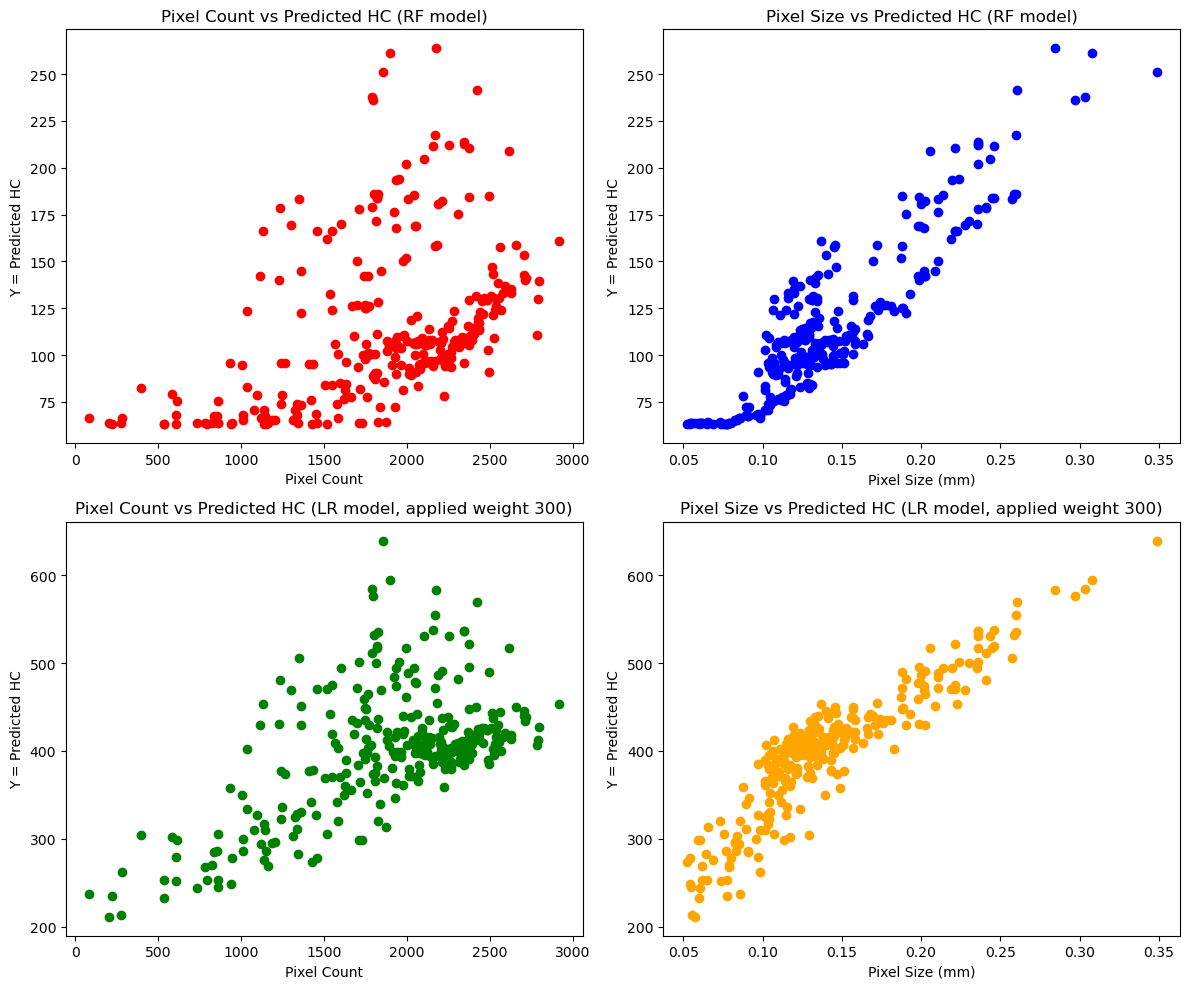

In [71]:
### try again for saving figure for RANDOM FOREST REGRESSOR #####
import matplotlib.pyplot as plt
import numpy as np

# Get the feature values for plotting
pixel_count = val_pixel_sz_HC_df['pixel_count']
pixel_size = val_pixel_sz_HC_df['pixel size(mm)']

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot pixel_count vs y_pred_rf
axs[0, 0].scatter(pixel_count, y_pred2_w_RF, color='red', label='Predicted Values')
axs[0, 0].set_xlabel('Pixel Count')
axs[0, 0].set_ylabel('Y = Predicted HC')
axs[0, 0].set_title('Pixel Count vs Predicted HC (RF model)')

# Plot pixel_size vs y_pred_rf
axs[0, 1].scatter(pixel_size, y_pred2_w_RF, color='blue', label='Predicted Values')
axs[0, 1].set_xlabel('Pixel Size (mm)')
axs[0, 1].set_ylabel('Y = Predicted HC')
axs[0, 1].set_title('Pixel Size vs Predicted HC (RF model)')

# Plot pixel_count vs y_pred_lr
axs[1, 0].scatter(pixel_count, y_pred_w_LR, color='green', label='Predicted Values')
axs[1, 0].set_xlabel('Pixel Count')
axs[1, 0].set_ylabel('Y = Predicted HC')
axs[1, 0].set_title('Pixel Count vs Predicted HC (LR model, applied weight 300)')

# Plot pixel_size vs y_pred_lr
axs[1, 1].scatter(pixel_size, y_pred_w_LR, color='orange', label='Predicted Values')
axs[1, 1].set_xlabel('Pixel Size (mm)')
axs[1, 1].set_ylabel('Y = Predicted HC')
axs[1, 1].set_title('Pixel Size vs Predicted HC (LR model, applied weight 300)')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as an image file
plt.savefig('Output/scatter_plots.png')





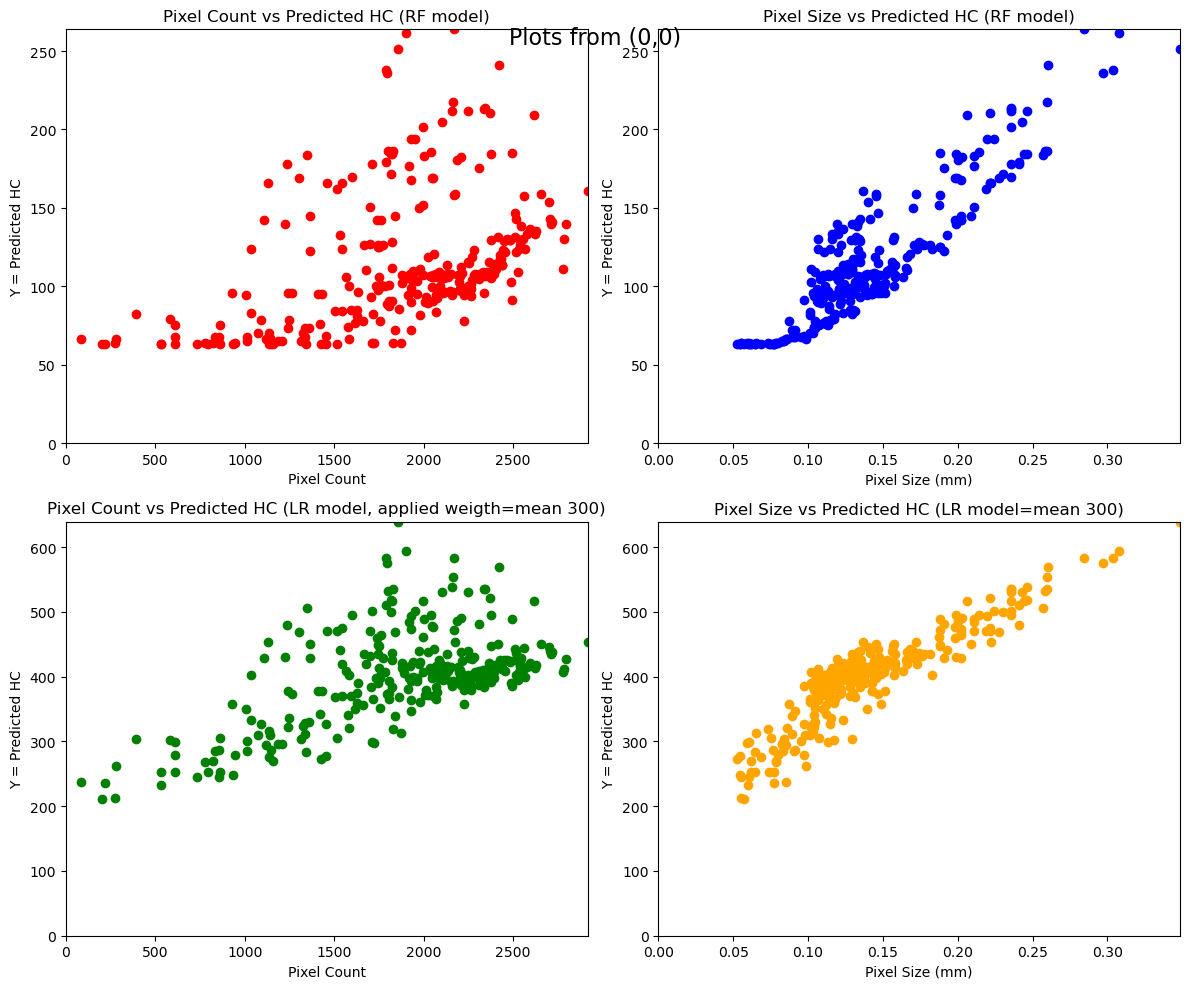

In [73]:
### to plot from 0,0
import matplotlib.pyplot as plt

# Get the feature values for plotting
pixel_count = val_pixel_sz_HC_df['pixel_count']
pixel_size = val_pixel_sz_HC_df['pixel size(mm)']

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot pixel_count vs y_pred_rf
axs[0, 0].scatter(pixel_count, y_pred2_w_RF, color='red', label='Predicted Values')
axs[0, 0].set_xlabel('Pixel Count')
axs[0, 0].set_ylabel('Y = Predicted HC')
axs[0, 0].set_title('Pixel Count vs Predicted HC (RF model)')
axs[0, 0].set_xlim(0, pixel_count.max())
axs[0, 0].set_ylim(0, y_pred2_w_RF.max())

# Plot pixel_size vs y_pred_rf
axs[0, 1].scatter(pixel_size, y_pred2_w_RF, color='blue', label='Predicted Values')
axs[0, 1].set_xlabel('Pixel Size (mm)')
axs[0, 1].set_ylabel('Y = Predicted HC')
axs[0, 1].set_title('Pixel Size vs Predicted HC (RF model)')
axs[0, 1].set_xlim(0, pixel_size.max())
axs[0, 1].set_ylim(0, y_pred2_w_RF.max())

# Plot pixel_count vs y_pred_lr
axs[1, 0].scatter(pixel_count, y_pred_w_LR, color='green', label='Predicted Values')
axs[1, 0].set_xlabel('Pixel Count')
axs[1, 0].set_ylabel('Y = Predicted HC')
axs[1, 0].set_title('Pixel Count vs Predicted HC (LR model, applied weigth=mean 300)')
axs[1, 0].set_xlim(0, pixel_count.max())
axs[1, 0].set_ylim(0, y_pred_w_LR.max())

# Plot pixel_size vs y_pred_lr
axs[1, 1].scatter(pixel_size, y_pred_w_LR, color='orange', label='Predicted Values')
axs[1, 1].set_xlabel('Pixel Size (mm)')
axs[1, 1].set_ylabel('Y = Predicted HC')
axs[1, 1].set_title('Pixel Size vs Predicted HC (LR model=mean 300)')
axs[1, 1].set_xlim(0, pixel_size.max())
axs[1, 1].set_ylim(0, y_pred_w_LR.max())

# Add a heading to the file
fig.text(0.5, 0.95, 'Plots from (0,0)', ha='center', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as an image file
plt.savefig('Output/scatter_plots00.png')



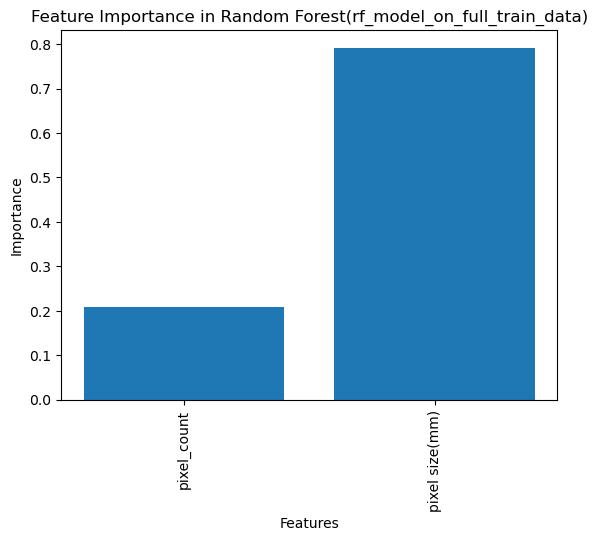

In [80]:
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest(rf_model_on_full_train_data)')
plt.xticks(rotation='vertical')
plt.show()

# Save the figure as an image file
#plt.savefig('Output\RF_feature_importance.png')

#from IPython.display import Image  as pyImage
#rf_weight_path = "Output\RF_feature_importance.png"
#os.path.exists(rf_weight_path)
#pyImage(rf_weight_path)

In [81]:
# Save the summary statistics as a text file

np.savetxt('output\summary_stats.txt', summary_stats)

# Calculate the correlation coefficients and p-values
correlation_rf, p_value_rf = pearsonr(y_val, y_pred2_w_RF)
correlation_lr, p_value_lr = pearsonr(y_val, y_pred_w_LR)

# Print the correlation coefficients and p-values
print("Random Forest Model:")
print("Correlation coefficient:", correlation_rf)
print("p-value:", p_value_rf)

print("Linear Regression Model with weight = meean = 300:")
print("Correlation coefficient:", correlation_lr)
print("p-value:", p_value_lr)



Random Forest Model:
Correlation coefficient: 0.8006404828563823
p-value: 2.915792071831754e-68
Linear Regression Model with weight = meean = 300:
Correlation coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85


In [ ]:
# Random Forest Model:
# Correlation coefficient: 0.8006404828563823
# p-value: 2.915792071831754e-68
# Linear Regression Model with weight = meean = 300:
# Correlation coefficient: 0.8512425465736275
# p-value: 1.928556935064102e-85
### therefore we use RANDOM FOREST REGRESSOR ###

In [83]:
import joblib

# Assuming rf_model_on_full_data is your trained Random Forest model
# ...

# Specify the filename and path for saving the model
model_filename = 'Modelfile\Jun15_rf.joblib'



In [84]:
# Save the model to a file
joblib.dump(rf_model_on_full_train_data, model_filename)

['Modelfile\\Jun15_rf.joblib']

In [ ]:
#import joblib

# Load the trained Random Forest model
#loaded_model = joblib.load('rf_model_on_full_data.joblib')

# Define a mapping function that uses the loaded model for predictions
def mapping_function(input_data):
    # Perform any necessary data preprocessing on input_data
    # ...

    # Make predictions using the loaded model
    predictions = loaded_model.predict(input_data)

    # Return the predictions
    return predictions

In [ ]:
##### run pixel count on selected predicted_images7 ######

In [85]:
selected_predicted_data_path_to = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/predicted_images2/'
os.path.exists(predicted_data_path_to)

True

In [86]:
x = '0_predict.png'

In [ ]:
# predict from single predicted HC labelled image
#get_pixel_count(predicted_data_path_to, x)

In [93]:
current_model_file = 'Modelfile/rf.joblib'
os.path.exists(current_model_file)

True

In [96]:
#import gradio as gr
#import pandas as pd
#import joblib
#import cv2

# Load the RF model
rf_model = joblib.load(current_model_file)

# Load the CSV file with pixel size data
#csv_file_path = 'pixel_size_data.csv'
#pixel_size_data = pd.read_csv(csv_file_path)

def predict_head_circumference(input_img, pixel_size):
    # Process the image (e.g., resize, normalize, etc.)
    #processed_image = preprocess_image(image)  #image already in binary form
    
    # Use the pixel size and other features to make a prediction
    feature_names = ['pixel_count','pixel size(mm)']  # Add other relevant features here
    pixel_count = get_pixel_count_gradio(input_img)
    pixel_size = pixel_size
    
    prediction = rf_model.predict([pixel_count,pixel_size])[0]
    print(prediction)
    
    return prediction

#def preprocess_image(image):
#    # Preprocess the image (e.g., resize, normalize, etc.)
#    # Modify this function based on your specific image preprocessing requirements
#    processed_image = cv2.resize(image, (224, 224))
#    processed_image = processed_image / 255.0  # Normalize pixel values
    
#    return processed_image

# Define the input and output interfaces for Gradio
inputs = [
    gr.inputs.Image(label="Image"),
    gr.inputs.Number(label="Pixel Size (mm)")
]

output = gr.outputs.Textbox(label="Head Circumference (mm)")

# Create the Gradio interface
gr_interface = gr.Interface(
    fn=predict_head_circumference,
    inputs=inputs,
    outputs=output,
    title="AF Discovery (Head Circumference Predictor)",
    description="Predicts the head circumference based on an image and pixel size.",
)

# Run the Gradio app
gr_interface.launch()

C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


In [ ]:
files = sorted(os.listdir(predicted_data_path_to))
pixel_count_list =[]
for f in files:
    pixel_count = get_pixel_count(predicted_data_path_to, f)
    pixel_count_list.append(pixel_count)

In [ ]:
pixel_count_list

In [ ]:
##### function get_pixe_count get_pixel_count(img_data_path, filename) ###  duplicate code from above.
def get_pixel_count(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count



In [ ]:
#train_pixel_sz_HC_df['pixel_count'] = train_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(img_data_path, x))
